# Understand the Data



In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px  
import plotly.graph_objects as go  

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Japan_vs_China\Big_Japan_vs_China_Technology.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,Country,Year,Tech Sector,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Top Tech Products Exported,Number of Tech Workers
989,Japan,2020,Robotics,43.523758,7.714283e+09,8275,359,1.667518e+11,95,1.617322e+10,7,61.076782,21.477690,184,Cloud Servers,790774
468,China,2018,Semiconductor,44.949195,4.913602e+10,6714,1444,6.437314e+10,119,9.543621e+09,10,71.107801,64.046930,122,5G Equipment,379485
792,China,2019,AI,33.685932,7.044209e+10,7719,1018,1.071717e+11,44,2.053193e+10,10,76.749969,23.223117,61,Robots,107483
400,Japan,2000,Semiconductor,36.847290,5.427819e+10,6902,212,9.657693e+10,145,6.453421e+08,12,66.072288,75.549338,76,Cloud Servers,696350
520,China,2005,Robotics,20.272409,2.851348e+10,6136,832,2.085888e+10,242,1.427058e+10,8,69.891551,89.429375,104,Cloud Servers,316305
83,China,2014,Robotics,44.833451,6.180051e+10,3023,1396,8.535919e+10,223,1.687611e+10,14,42.091606,73.243819,196,Cloud Servers,667370
837,Japan,2009,Software,46.128928,5.586805e+10,8277,1868,6.673545e+10,307,1.407910e+10,10,92.934803,31.857512,117,Semiconductors,284786


In [3]:
df.size

16000

In [4]:
df.shape

(1000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             1000 non-null   object 
 1   Year                                1000 non-null   int64  
 2   Tech Sector                         1000 non-null   object 
 3   Market Share (%)                    1000 non-null   float64
 4   R&D Investment (in USD)             1000 non-null   float64
 5   Number of Patents Filed (Annual)    1000 non-null   int64  
 6   Number of Tech Companies            1000 non-null   int64  
 7   Tech Exports (in USD)               1000 non-null   float64
 8   Number of Startups                  1000 non-null   int64  
 9   Venture Capital Funding (in USD)    1000 non-null   float64
 10  Global Innovation Ranking           1000 non-null   int64  
 11  Internet Penetration (%)            1000 non

In [6]:
df.describe(include='all')

,Country,Year,Tech Sector,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Top Tech Products Exported,Number of Tech Workers
count,1000,1000.000000,1000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,2,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,Japan,NaN,Robotics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloud Servers,NaN
freq,503,NaN,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229,NaN
mean,NaN,2011.497000,NaN,27.439221,5.034591e+10,5094.686000,1011.133000,9.905279e+10,257.524000,2.467234e+10,10.003000,69.739498,49.970784,99.084000,NaN,496483.411000
std,NaN,6.991486,NaN,12.808159,2.829704e+10,2846.164392,563.223321,5.921177e+10,143.525939,1.469330e+10,5.533318,17.071675,23.012153,55.374319,NaN,290405.281594
min,NaN,2000.000000,NaN,5.033959,1.056575e+09,119.000000,52.000000,1.072723e+09,11.000000,3.681449e+07,1.000000,40.079130,10.043427,1.000000,NaN,2422.000000
25%,NaN,2005.000000,NaN,16.333641,2.558291e+10,2789.500000,503.000000,4.605266e+10,131.000000,1.195372e+10,5.000000,54.879624,29.796081,53.000000,NaN,248962.500000
50%,NaN,2012.000000,NaN,27.111042,5.010075e+10,5021.000000,998.500000,9.671071e+10,257.500000,2.453826e+10,10.000000,70.257998,51.150191,100.000000,NaN,505236.000000
75%,NaN,2017.250000,NaN,38.480568,7.492896e+10,7569.500000,1494.250000,1.520491e+11,382.250000,3.711508e+10,15.000000,84.408627,69.795189,147.000000,NaN,737879.250000


In [7]:
df.columns

Index(['Country', 'Year', 'Tech Sector', 'Market Share (%)',
       'R&D Investment (in USD)', 'Number of Patents Filed (Annual)',
       'Number of Tech Companies', 'Tech Exports (in USD)',
       'Number of Startups', 'Venture Capital Funding (in USD)',
       'Global Innovation Ranking', 'Internet Penetration (%)',
       '5G Network Coverage (%)', 'University Research Collaborations',
       'Top Tech Products Exported', 'Number of Tech Workers'],
      dtype='object')

# Data Cleaning 

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Country                               0
Year                                  0
Tech Sector                           0
Market Share (%)                      0
R&D Investment (in USD)               0
Number of Patents Filed (Annual)      0
Number of Tech Companies              0
Tech Exports (in USD)                 0
Number of Startups                    0
Venture Capital Funding (in USD)      0
Global Innovation Ranking             0
Internet Penetration (%)              0
5G Network Coverage (%)               0
University Research Collaborations    0
Top Tech Products Exported            0
Number of Tech Workers                0
dtype: int64

<Axes: >

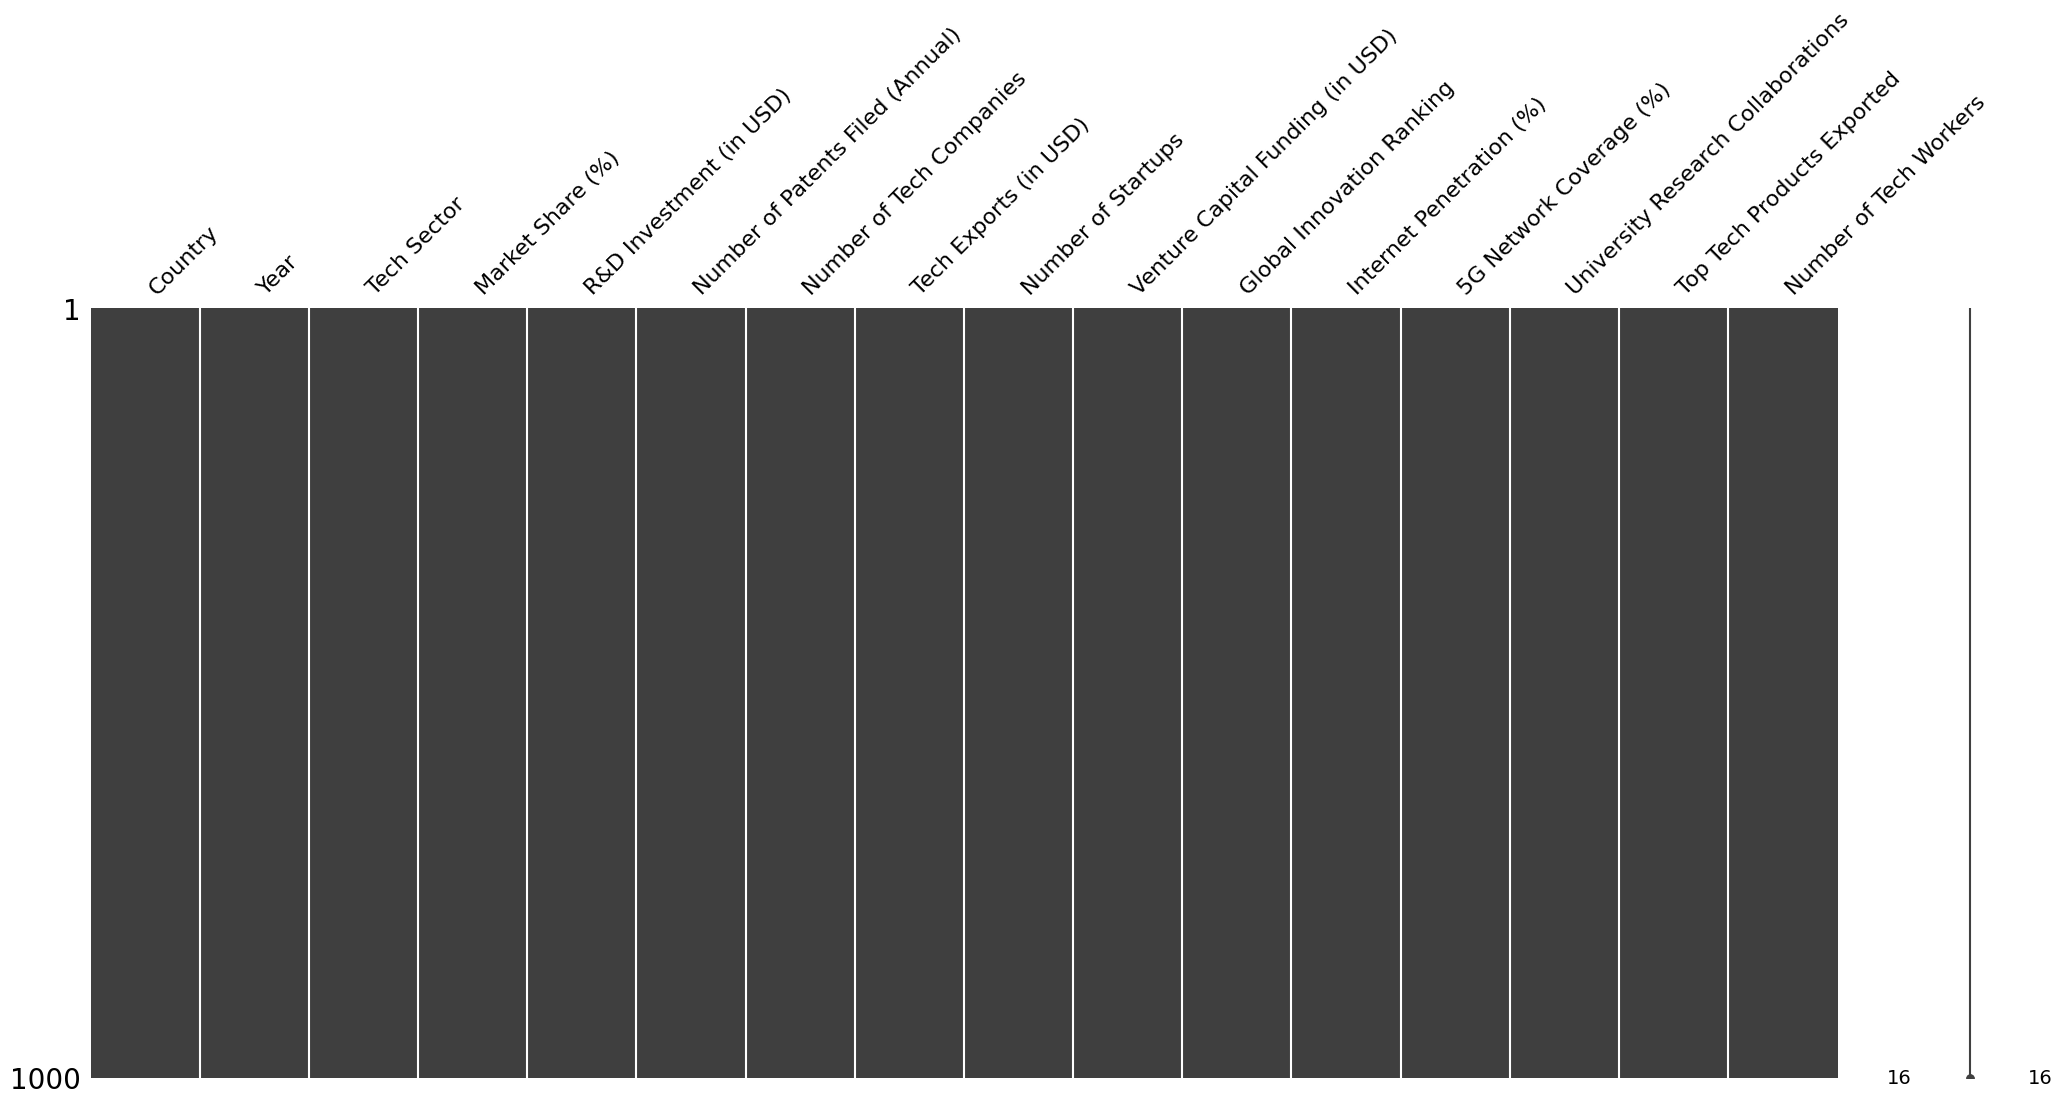

In [10]:
msno.matrix(df)

## Rename the columns

In [11]:
df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Tech Sector': 'tech_sector',
    'Market Share (%)': 'market_share',
    'R&D Investment (in USD)': 'rd_investment_usd',
    'Number of Patents Filed (Annual)': 'patents_filed_annual',
    'Number of Tech Companies': 'tech_companies',
    'Tech Exports (in USD)': 'tech_exports_usd',
    'Number of Startups': 'startups',
    'Venture Capital Funding (in USD)': 'vc_funding_usd',
    'Global Innovation Ranking': 'innovation_ranking',
    'Internet Penetration (%)': 'internet_penetration',
    '5G Network Coverage (%)': '5g_coverage',
    'University Research Collaborations': 'university_collaborations',
    'Top Tech Products Exported': 'top_tech_exports',
    'Number of Tech Workers': 'tech_workers'
}, inplace=True)


In [12]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [13]:
df.columns

Index(['country', 'year', 'tech_sector', 'market_share', 'rd_investment_usd',
       'patents_filed_annual', 'tech_companies', 'tech_exports_usd',
       'startups', 'vc_funding_usd', 'innovation_ranking',
       'internet_penetration', '5g_coverage', 'university_collaborations',
       'top_tech_exports', 'tech_workers'],
      dtype='object')

# Analysis

## Bivariate   Analysis

### Market Share Based on Tech Sector

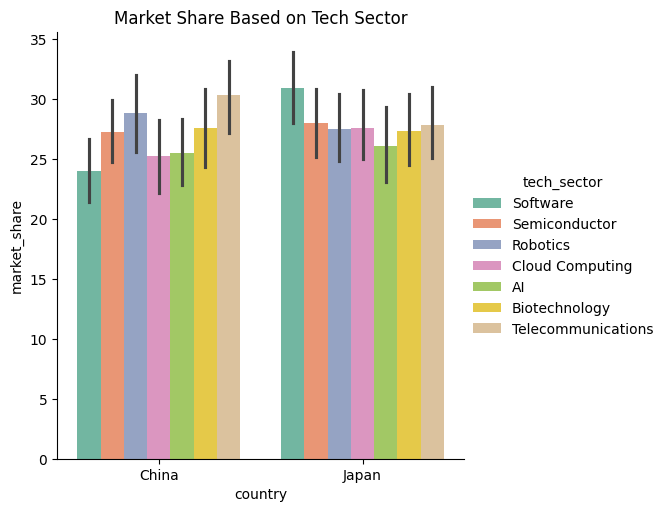

In [14]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['market_share'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech Sector')
plt.show()

### R%D Investment

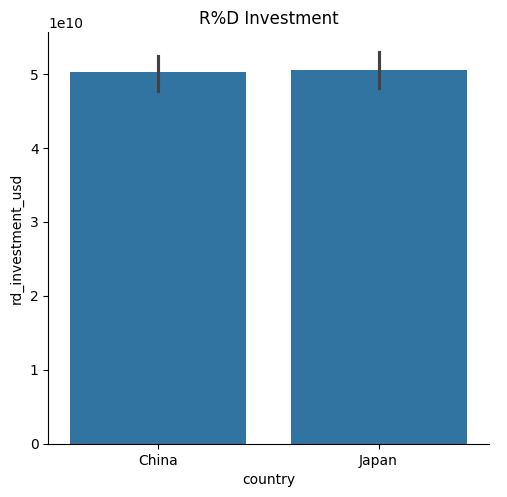

In [15]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['rd_investment_usd'],

)

plt.title('R%D Investment')
plt.show()

### patents_filed_annual

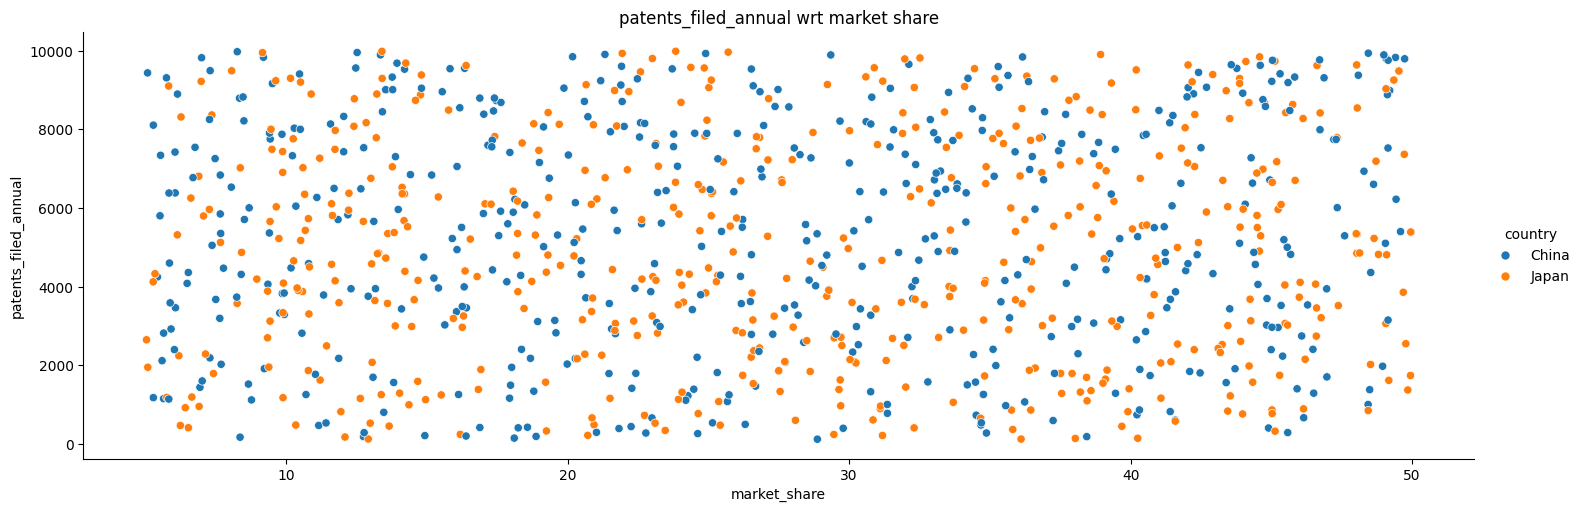

In [16]:
sns.relplot(
    df,
    x=df['market_share'],
    y=df['patents_filed_annual'],
    hue='country',
    aspect=3,
)

plt.title('patents_filed_annual wrt market share')
plt.show()

### Market Share Based on Tech Companies

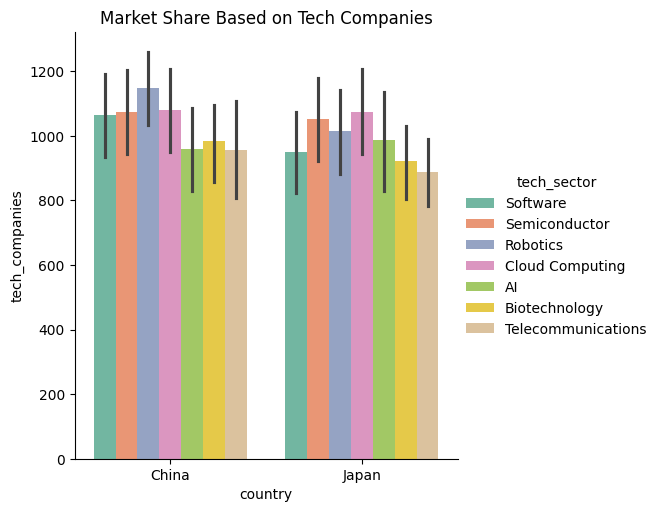

In [17]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['tech_companies'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech Companies')
plt.show()

### Market Share Based on Tech Exports

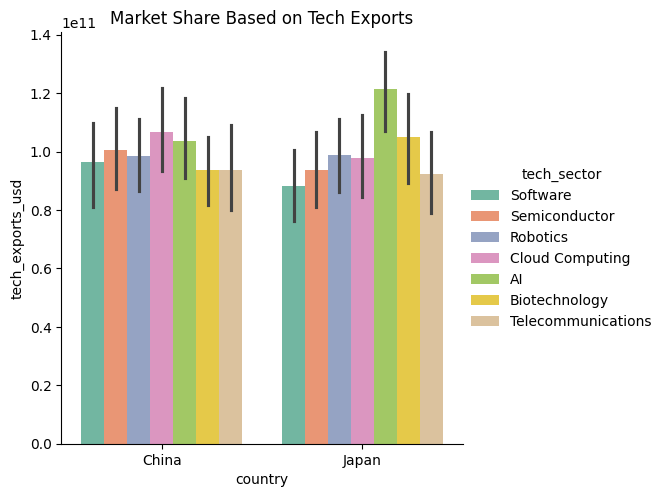

In [18]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['tech_exports_usd'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech Exports')
plt.show()

### Market Share Based on Tech startups

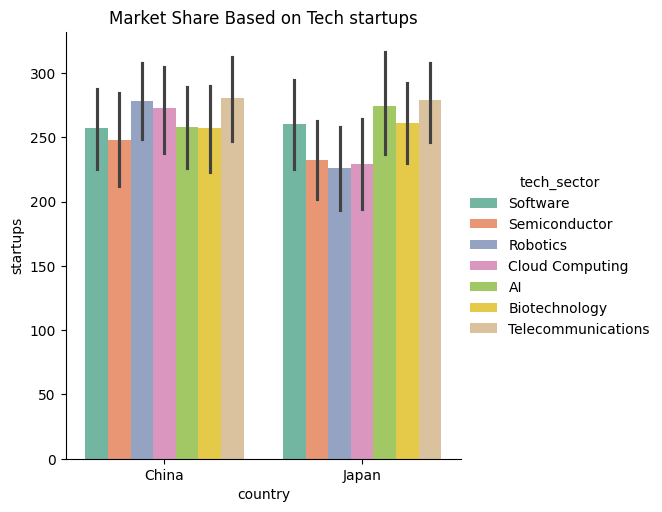

In [19]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['startups'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech startups')
plt.show()

### Market Share Based on Funding

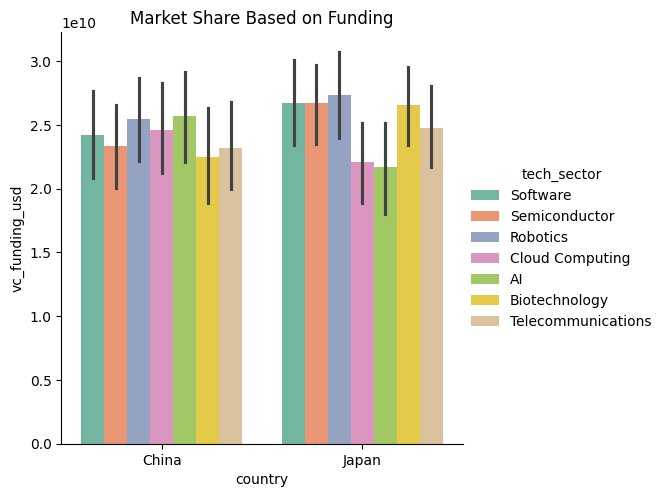

In [20]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['vc_funding_usd'],
    hue=df['tech_sector'],
    palette='Set2',
)

plt.title('Market Share Based on Funding')
plt.show()

### Market Share Based on internet

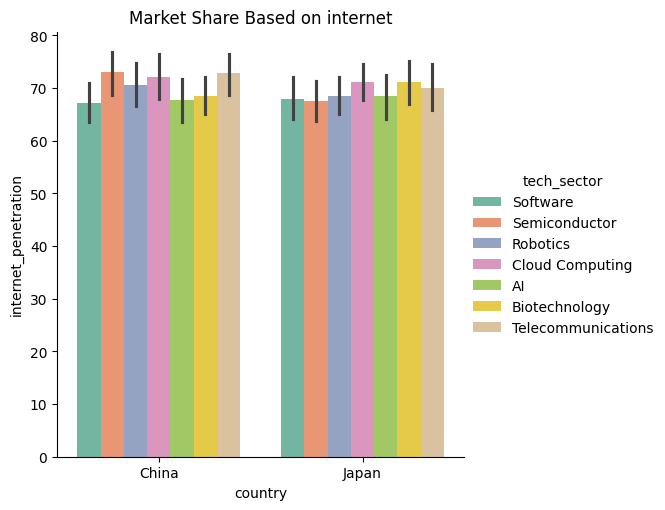

In [21]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['internet_penetration'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on internet')
plt.show()

### Market Share Based on 5G

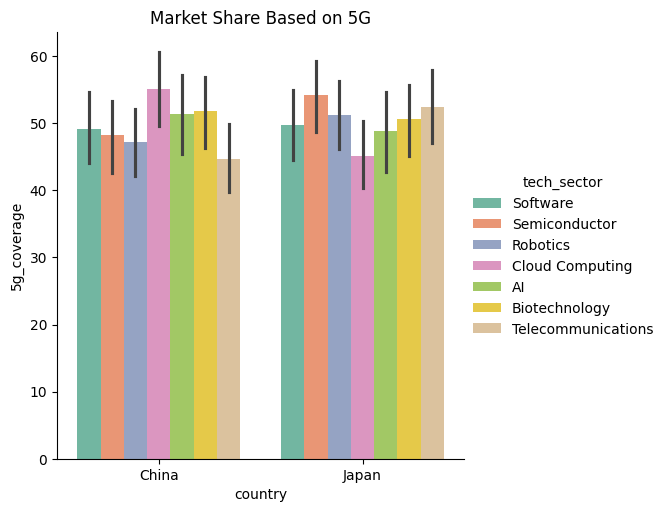

In [22]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['5g_coverage'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on 5G')
plt.show()

### Market Share Based on Tech startups

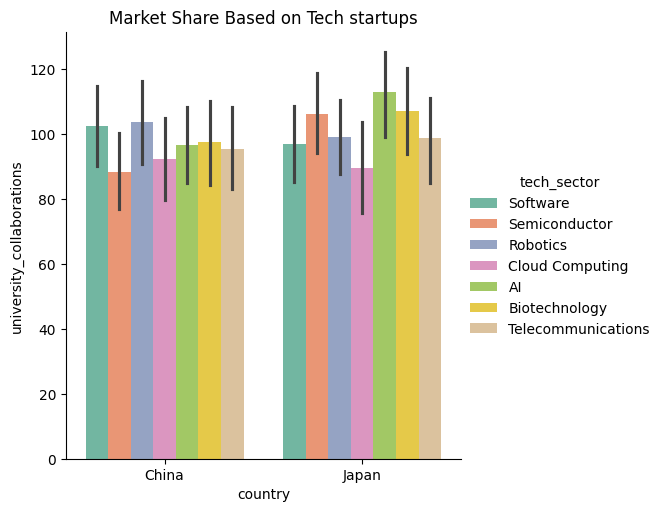

In [23]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['university_collaborations'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech startups')
plt.show()

### Market Share Based on Tech Worker

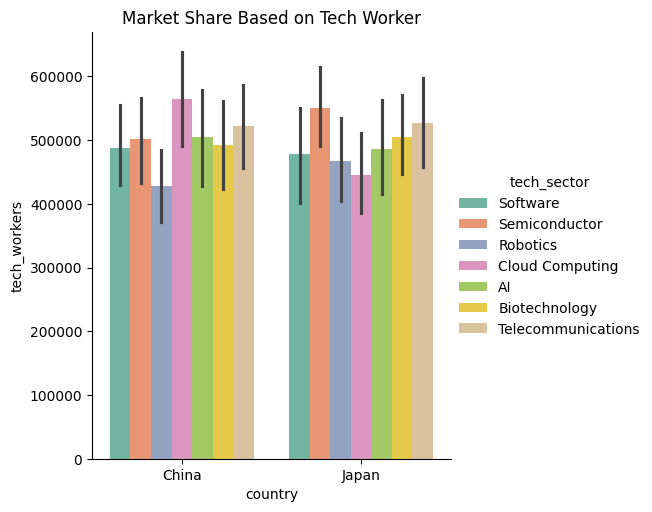

In [24]:
sns.catplot(
    df,
    kind='bar',
    x=df['country'],
    y=df['tech_workers'],
    hue=df['tech_sector'],
    palette='Set2'
)

plt.title('Market Share Based on Tech Worker')
plt.show()

## Multivariate Analysis

### Market Share by Country, Tech Sector, and Top Tech Exports

In [25]:
fig = px.bar(
    df, 
    x='country', 
    y='market_share', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='Market Share by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'},  # Add label for better axis understanding
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### R&D Investment by Country, Tech Sector, and Top Tech Exports

In [26]:
fig = px.bar(
    df, 
    x='country', 
    y='rd_investment_usd', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='R&D Investment by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### Patent Filed Annually by Country, Tech Sector, and Top Tech Exports

In [27]:
fig = px.bar(
    df, 
    x='country', 
    y='patents_filed_annual', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='Patent Filed Annually by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### Tech Companies by Country, Tech Sector, and Top Tech Exports

In [28]:
fig = px.bar(
    df, 
    x='country', 
    y='tech_companies', 
    color='tech_companies', 
    facet_col='tech_sector', 
    title='Tech Companies by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### Tech Exports (USD $ )

In [29]:
fig = px.bar(
    df, 
    x='country', 
    y='tech_exports_usd', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='Tech Exports (USD $ ) by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### Startups by Country, Tech Sector, and Top Tech Exports

In [30]:
fig = px.bar(
    df, 
    x='country', 
    y='startups', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='Startups by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

###  Tech Worker by Country, Tech Sector, and Top Tech Exports

In [31]:
fig = px.bar(
    df, 
    x='country', 
    y='tech_workers', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title=' Tech Worker by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### university collaborations by Country, Tech Sector, and Top Tech Exports

In [32]:

fig = px.bar(
    df, 
    x='country', 
    y='university_collaborations', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title=' university collaborations by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

### 5G

In [33]:
fig = px.bar(
    df, 
    x='country', 
    y='5g_coverage', 
    color='top_tech_exports', 
    facet_col='tech_sector', 
    title='5G  by Country, Tech Sector, and Top Tech Exports',
    labels={'market_share':'Market Share (%)'}, 
    barmode='group',
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.show()

# Time Series Analysis

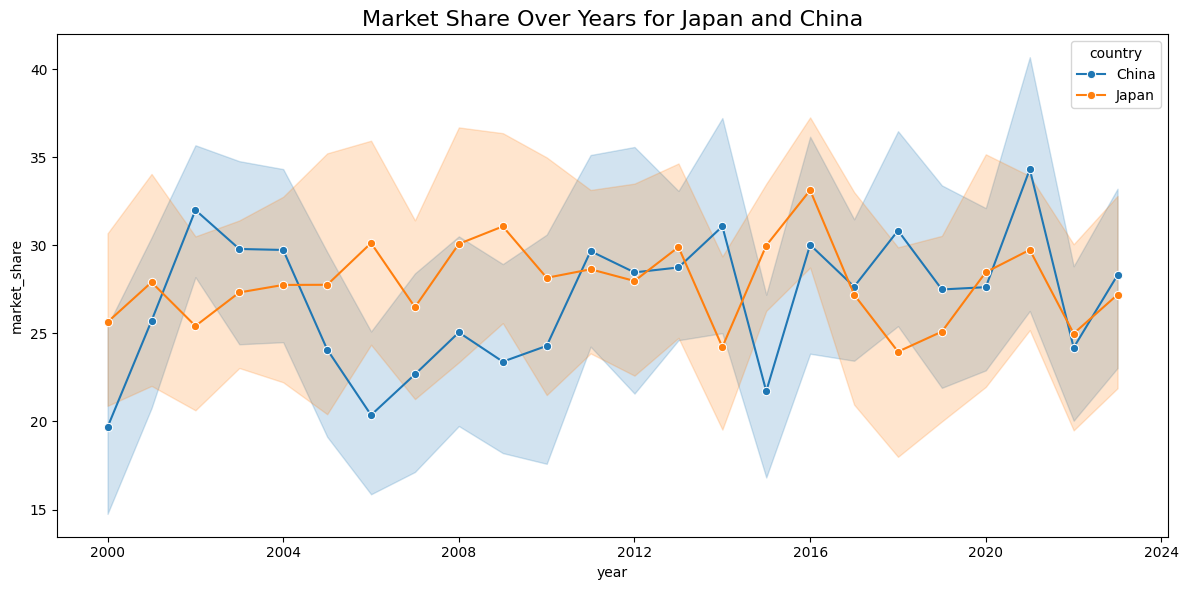

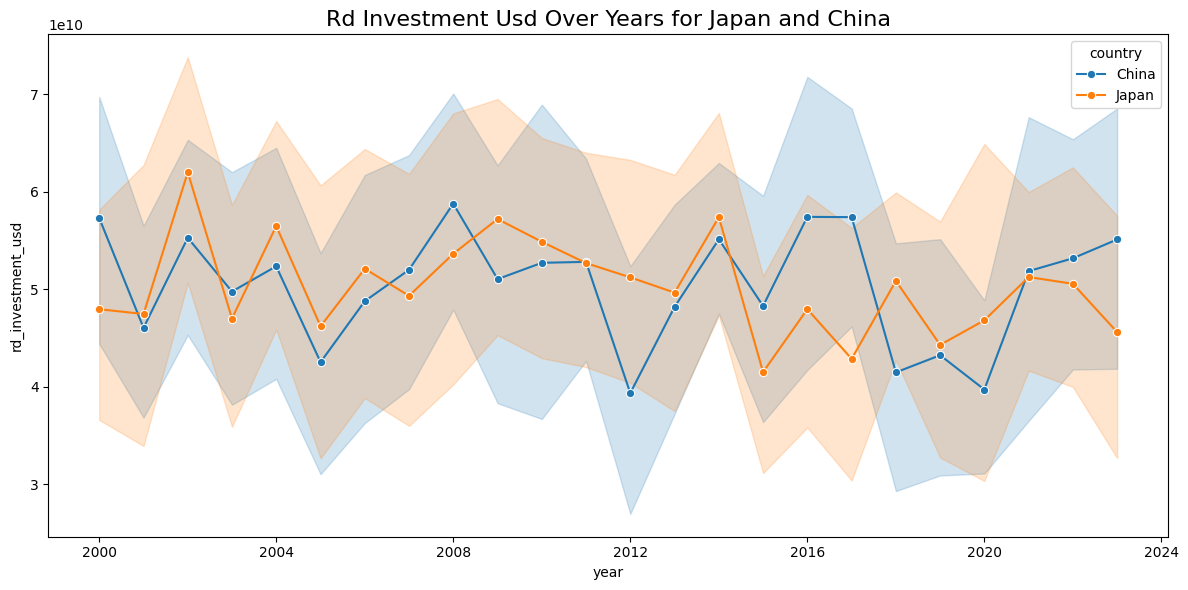

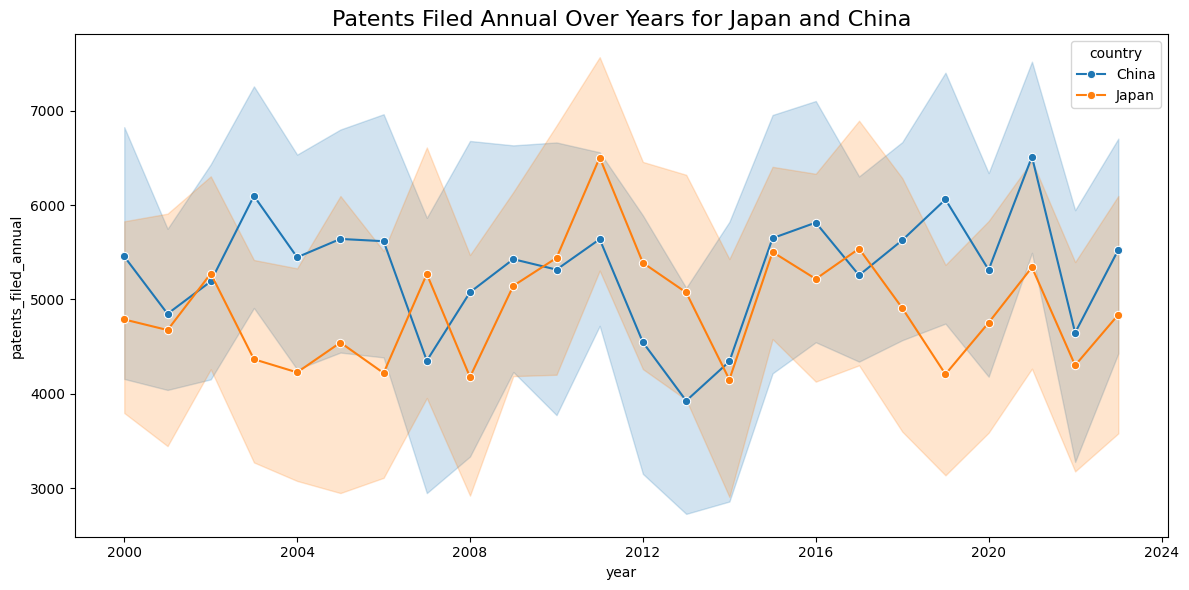

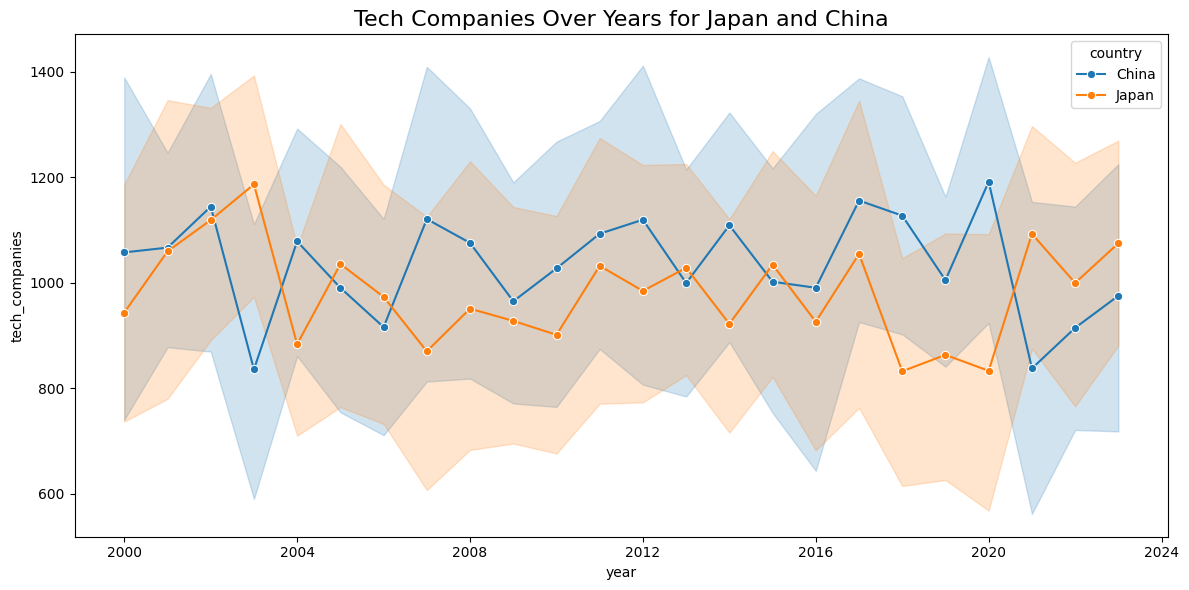

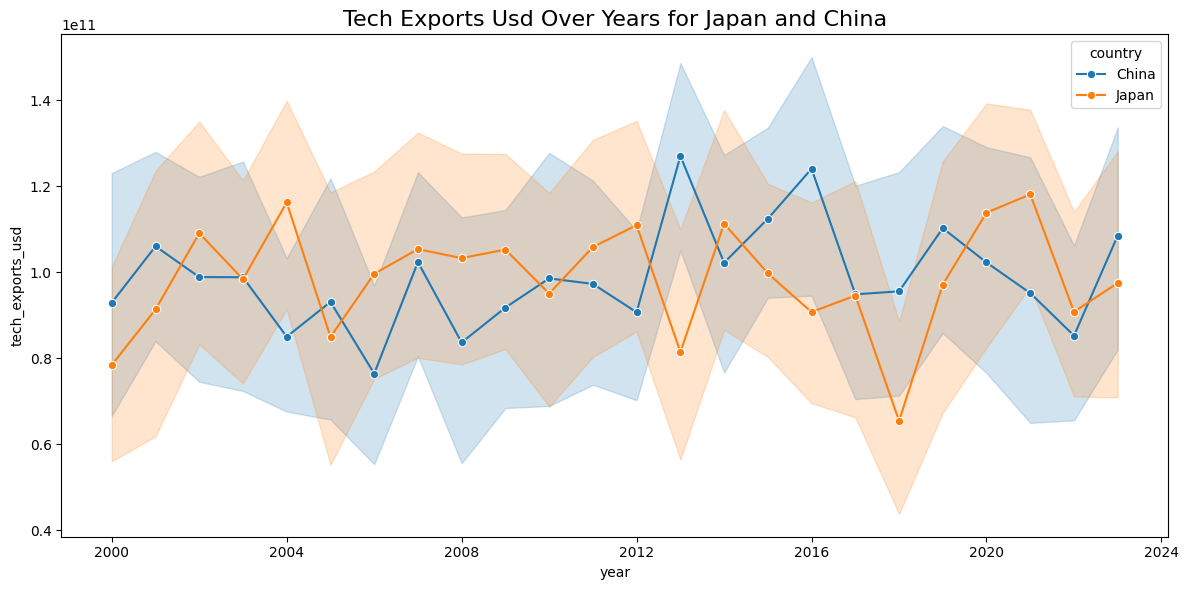

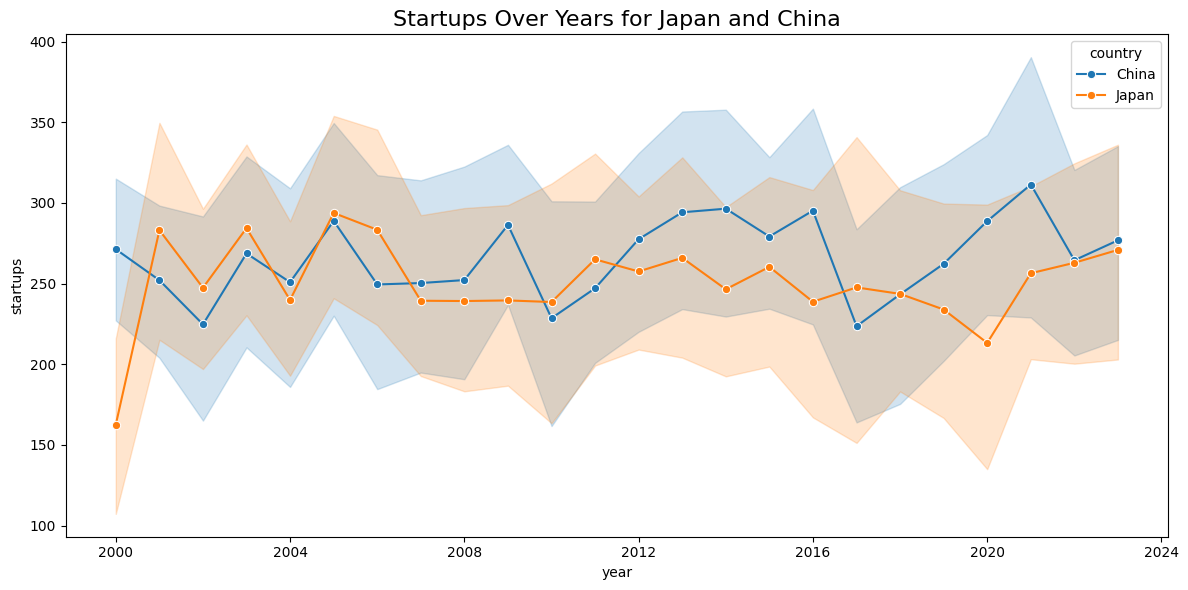

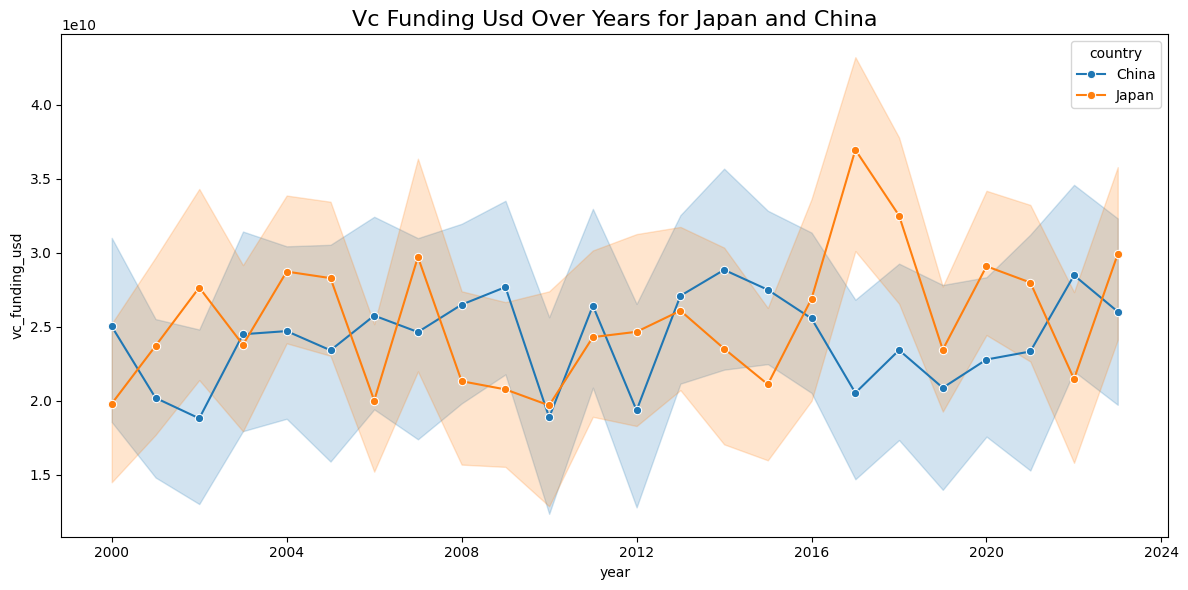

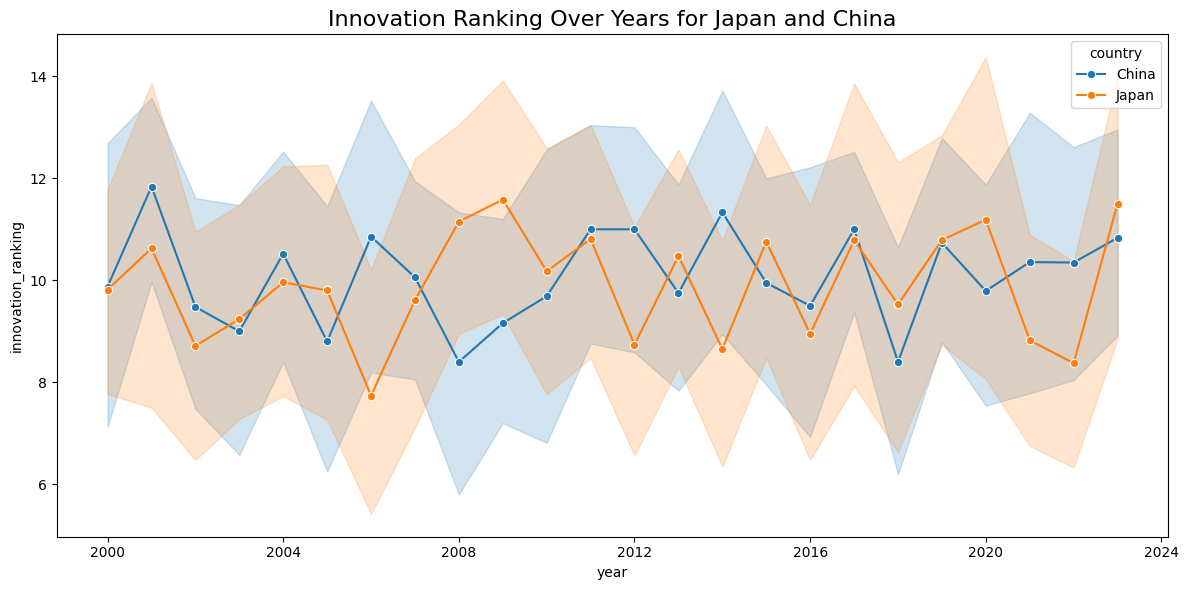

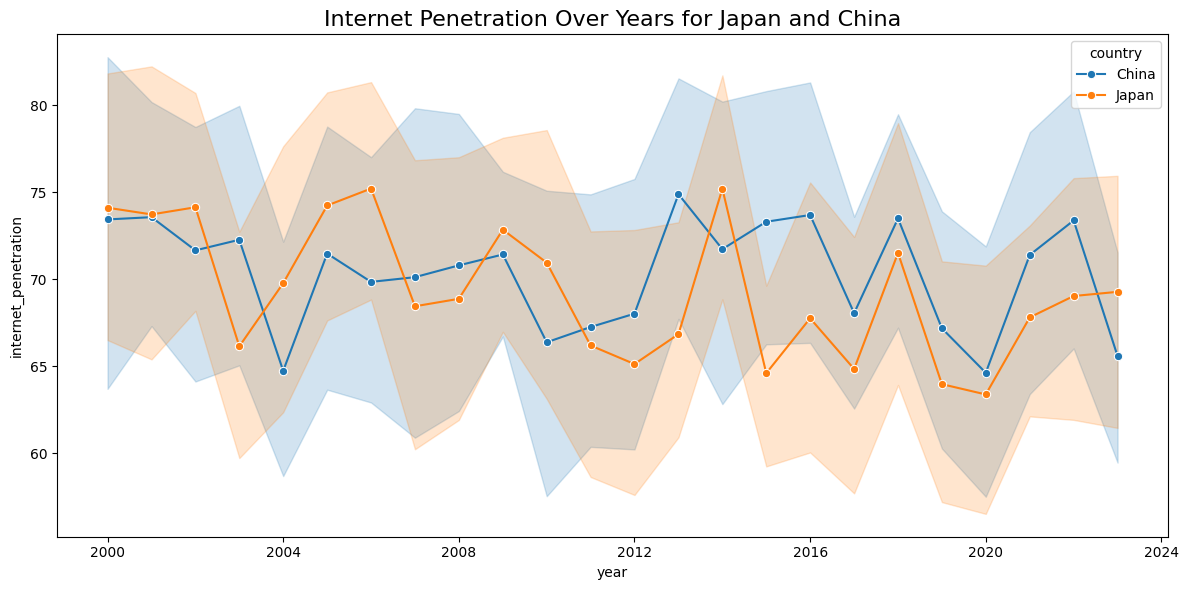

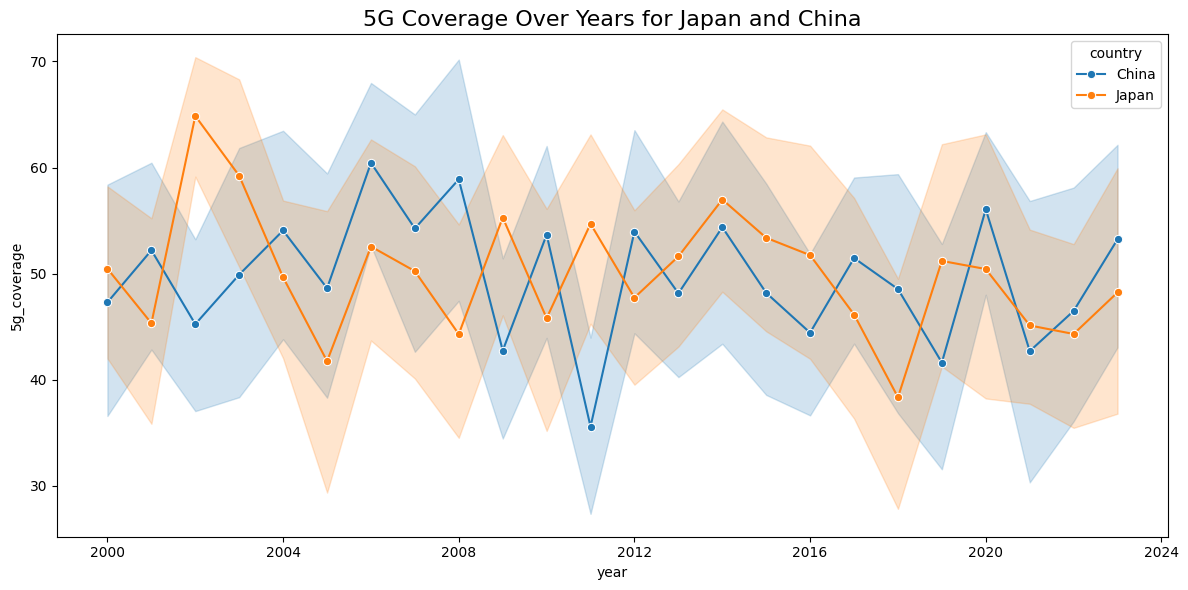

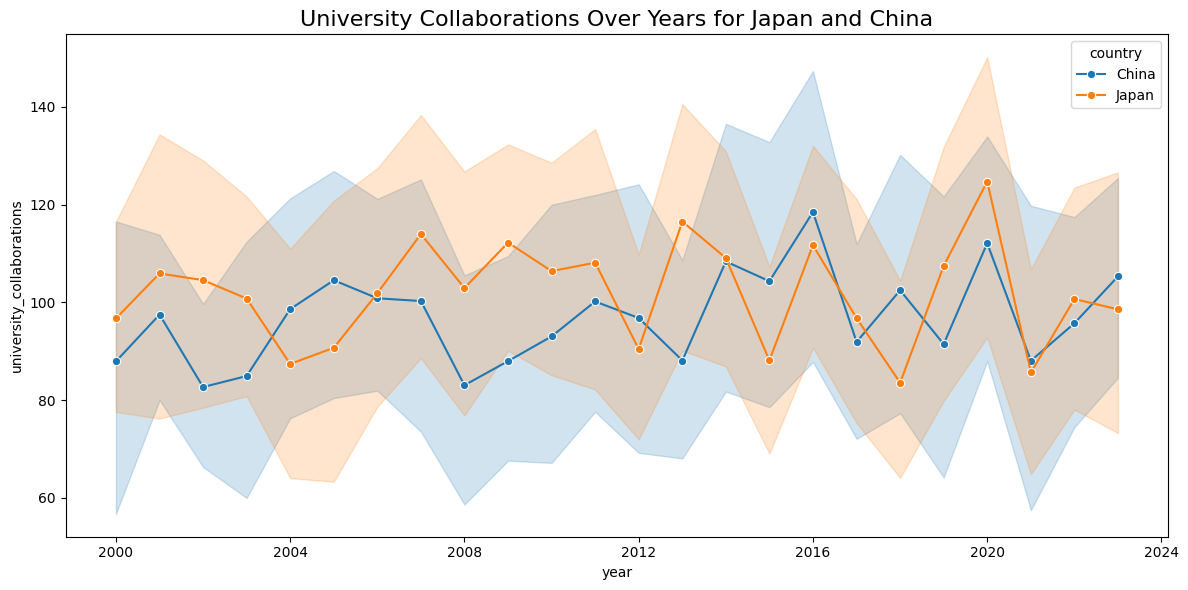

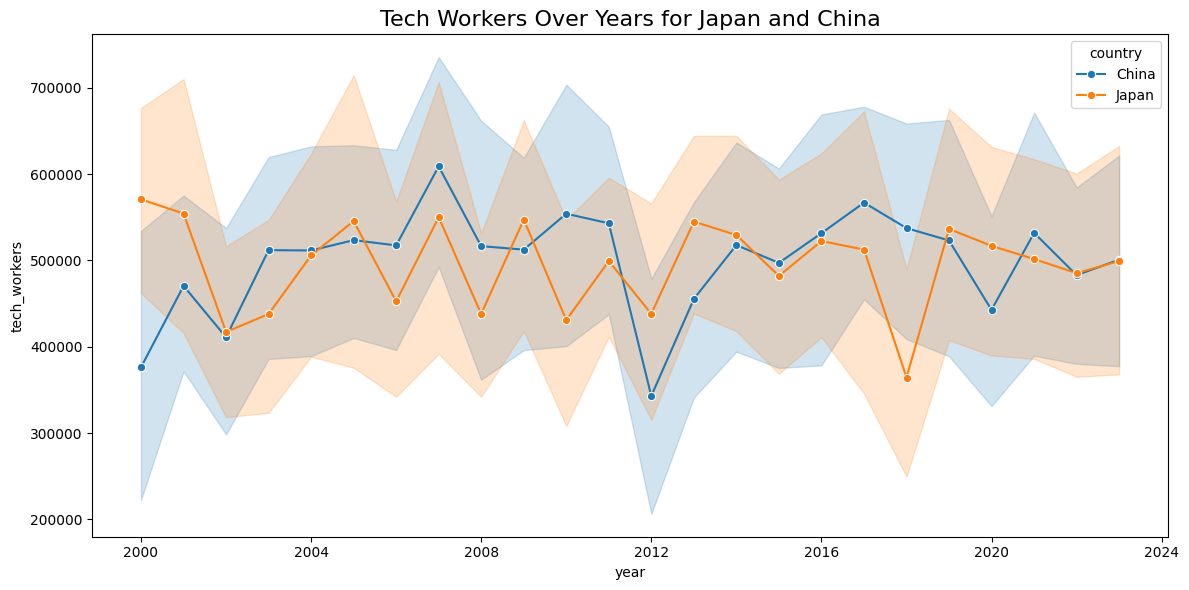

In [34]:
# Convert 'year' column to datetime 
df['year'] = pd.to_datetime(df['year'], format='%Y')

# List of numerical columns 
numerical_columns = [
    'market_share', 'rd_investment_usd', 'patents_filed_annual', 
    'tech_companies', 'tech_exports_usd', 'startups', 
    'vc_funding_usd', 'innovation_ranking', 'internet_penetration', 
    '5g_coverage', 'university_collaborations', 'tech_workers'
]

# Loop through numerical columns to create plots
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df,
        x='year',
        y=col,
        hue='country',  # Color by country
        marker='o'  # Use markers for each data point
    )
    plt.title(f'{col.replace("_", " ").title()} Over Years for Japan and China', fontsize=16)
    plt.tight_layout()
    plt.show()


# Conclusion  

<div class="alert alert-block alert-info">

**Conclusion**

</div>